# Star tracker

## Content

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LY2KM=9e12
L02W=3.828e26
W2phN=3.076e17

dark_current=100 # e/(pixel*s)
lens_diam=5 # cm

In [9]:
# dubhe
d_lum=16.5
d_dis=124

# megrez
m_lum=1.4
m_dis=81


In [10]:
def phothon_enters(intensity,distance, lens_diam):
    
    # comvert units
    intensity_w=intensity*L02W
    photons_total=intensity_w*W2phN
    distance_km=distance*LY2KM
    distance_m=distance_km*1000
    
    # lens to proegation sphere ratio
    sphere_surface=4*3.14*distance_m**2
    
    lens_surface=3.14*(lens_diam/100/2)**2
    
    ratio=lens_surface/sphere_surface
    
    return photons_total*ratio
    

In [11]:
print("for megrez")
print(phothon_enters(m_lum,m_dis, lens_diam)/1900,"per mm**2")
print(phothon_enters(m_lum,m_dis, lens_diam)/W2phN,"whats")
print()
print("for dubhe")
print(phothon_enters(d_lum,d_dis, lens_diam)/1900,"per mm**2")
print(phothon_enters(d_lum,m_dis, lens_diam)/W2phN,"whats")

for megrez
25.50924848913763 per mm**2
1.5756687948427014e-13 whats

for dubhe
128.28628842093093 per mm**2
1.857038222493184e-12 whats


In [12]:
def snr(photons_rate,t,dark_current):
   
    total_photons=photons_rate*t
    
    
    print("p rate,t,total photons,std=",photons_rate,t,total_photons)

    return total_photons/np.sqrt(total_photons+dark_current*t)

p rate,t,total photons,std= 243743.94799976877 [0.001 0.005 0.01  0.05  0.1   1.   ] [   243.743948     1218.71974      2437.43948     12187.19739999
  24374.39479998 243743.94799977]


p rate,t,total photons,std= 48467.5721293615 [0.001 0.005 0.01  0.05  0.1   1.   ] [   48.46757213   242.33786065   484.67572129  2423.37860647
  4846.75721294 48467.57212936]




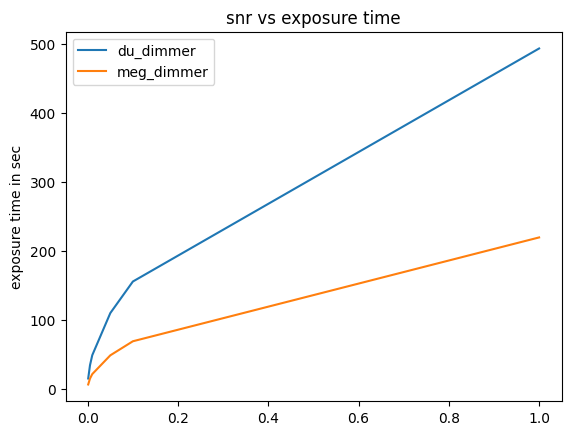

p rate,t,total photons,std= 243743.94799976877 [0.001 0.005 0.01  0.05  0.1  ] [  243.743948    1218.71974     2437.43948    12187.19739999
 24374.39479998]


p rate,t,total photons,std= 48467.5721293615 [0.001 0.005 0.01  0.05  0.1  ] [  48.46757213  242.33786065  484.67572129 2423.37860647 4846.75721294]




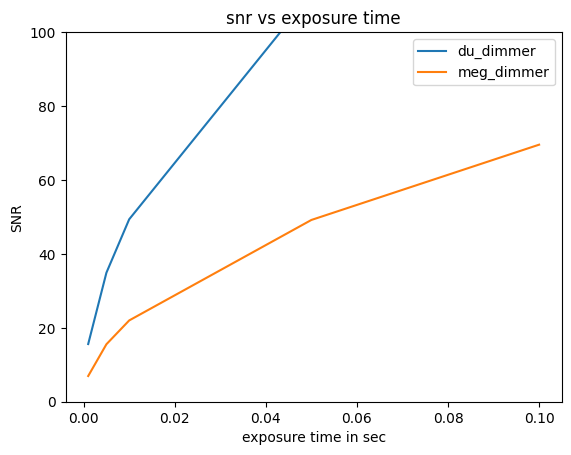

In [16]:
photon_rate_per_pixel_d=phothon_enters(d_lum,d_dis, lens_diam)
photon_rate_per_pixel_m=phothon_enters(m_lum,m_dis, lens_diam)

t_exp=np.array([0.001,0.005,0.01,0.05,0.1,1])
# t_exp=1
plt.title("snr vs exposure time")

plt.plot(t_exp,snr(photon_rate_per_pixel_d,t_exp,dark_current))
plt.plot(t_exp,snr(photon_rate_per_pixel_m,t_exp,dark_current))
plt.ylabel('SNR')
plt.ylabel('exposure time in sec')
plt.legend(["du_dimmer","meg_dimmer"])
plt.show()


t_exp=np.array([0.001,0.005,0.01,0.05,0.1])
plt.title("snr vs exposure time")

plt.plot(t_exp,snr(photon_rate_per_pixel_d,t_exp,dark_current))
plt.plot(t_exp,snr(photon_rate_per_pixel_m,t_exp,dark_current))
plt.ylim([0,100])
plt.ylabel('SNR')
plt.xlabel('exposure time in sec')
plt.legend(["du_dimmer","meg_dimmer"])
plt.show()

In [15]:


# t_exp=1
# pixel=np.array([10,100,500,1000])
# photon_rate_per_pixel_d=phothon_enters(d_lum,d_dis, lens_diam)/pixel**2
# photon_rate_per_pixel_m=phothon_enters(m_lum,m_dis, lens_diam)/pixel**2
# # t_exp=1
# plt.title("snr vs number of pixel in a raw")

# plt.plot(pixel,snr(photon_rate_per_pixel_d,t_exp,dark_current))
# plt.plot(pixel,snr(photon_rate_per_pixel_m,t_exp,dark_current))
# plt.legend(["du","meg"])
# plt.show()